In [1]:
import numpy as np
import torch

In [2]:
from torch import optim

In [3]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [4]:
from pred_learn.models import RecursiveConvTransition
from pred_learn.data import ObservationDataset, ObservationSeriesDataset

In [5]:
import gym_ple
import gym_tetris

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


/home/ira/code/cool-code/gym/gym/envs/registration.py:56: UserWarning: DEPRECATION WARNING wrapper_config.TimeLimit has been deprecated. Replace any calls to `register(tags={'wrapper_config.TimeLimit.max_episode_steps': 200)}` with `register(max_episode_steps=200)`. This change was made 2017/1/31 and is included in gym version 0.8.0. If you are getting many of these warnings, you may need to update switch from universe 0.21.3 to retro (https://github.com/openai/retro)
  warnings.warn("DEPRECATION WARNING wrapper_config.TimeLimit has been deprecated. Replace any calls to `register(tags={'wrapper_config.TimeLimit.max_episode_steps': 200)}` with `register(max_episode_steps=200)`. This change was made 2017/1/31 and is included in gym version 0.8.0. If you are getting many of these warnings, you may need to update switch from universe 0.21.3 to retro (https://github.com/openai/retro)")


In [13]:
ENV_ID = "Catcher-ple-v0"
action_space_n = gym_ple.make(ENV_ID).action_space.n
dataset_train = ObservationSeriesDataset("../recorded/{}/0.torch".format(ENV_ID), action_space_n, series_length=8)
dataset_single = ObservationDataset("../recorded/{}/0.torch".format(ENV_ID), action_space_n)
dataset_single.record = dataset_train.record

train_loader = torch.utils.data.DataLoader(
    dataset_train, batch_size=8, shuffle=True, num_workers=2
)

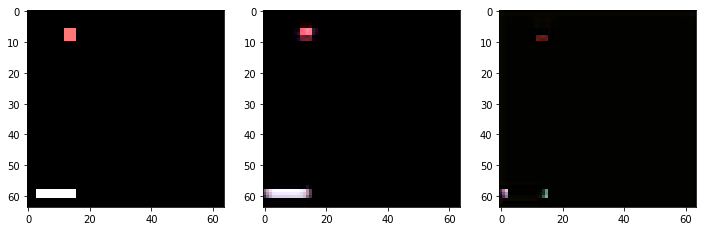

In [ ]:
# replay record
start = np.random.randint(1000)
with torch.no_grad():
    memory = None
    for i in range(start, 1000):
        timestep = dataset_single[i]
        obs = timestep["s1"]
        action = timestep["a0"]
        terminal = timestep['terminal']        
        
        plt.figure(figsize=(12, 12))
        plt.subplot(131)
        plt.imshow(obs.permute([2,1,0]))
    #     obs = resize(obs, (64, 64))
        plt.subplot(132)
        recon, memory, rew = model(timestep["s0"].unsqueeze(0).cuda(), action.unsqueeze(0), memory)
        memory[terminal.squeeze()==1 ,...] = 0
        
        recon = recon.squeeze(0).cpu()
        plt.imshow(recon.permute([2,1,0]).clamp(0, 1))

        plt.subplot(133)
        diff = (recon - obs)**2
        plt.imshow(diff.permute([2,1,0]).clamp(0, 1))
        
        
    #     plt.imshow(timestep["s0"])
#         print("reward", timestep['r1'])
#         print("action", timestep['a0'])
        plt.pause(0.3)
        clear_output(True)
    

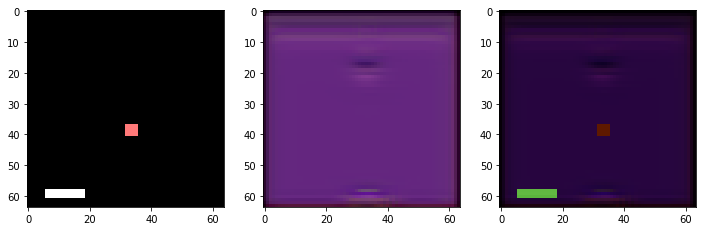

KeyboardInterrupt: 

In [12]:
# replay record
start = np.random.randint(1000)
with torch.no_grad():
    memory = None
    for i in range(start, start + 5):
        timestep = dataset_single[i]
        obs = timestep["s1"]
        action = timestep["a0"]
        terminal = timestep['terminal']        
        
        plt.figure(figsize=(12, 12))
        plt.subplot(131)
        plt.imshow(obs.permute([2,1,0]))
    #     obs = resize(obs, (64, 64))
        plt.subplot(132)
        recon, memory, rew = model(timestep["s0"].unsqueeze(0).cuda(), action.unsqueeze(0), memory)
        memory[terminal.squeeze()==1 ,...] = 0
        
        recon = recon.squeeze(0).cpu()
        plt.imshow(recon.permute([2,1,0]).clamp(0, 1))

        plt.subplot(133)
        diff = (recon - obs)**2
        plt.imshow(diff.permute([2,1,0]).clamp(0, 1))
        
        
    #     plt.imshow(timestep["s0"])
#         print("reward", timestep['r1'])
#         print("action", timestep['a0'])
        plt.pause(0.3)
        clear_output(True)

    timestep = dataset_single[start+5]
    pred = timestep["s0"]
    for i in range(start + 5, 1000):
    
        timestep = dataset_single[i]
        obs = timestep["s1"]
        action = timestep["a0"]
        terminal = timestep['terminal']        
        
        plt.figure(figsize=(12, 12))
        plt.subplot(131)
        plt.imshow(obs.permute([2,1,0]))
    #     obs = resize(obs, (64, 64))
        plt.subplot(132)
        pred, memory, rew = model(pred.unsqueeze(0).cuda().clamp(0, 1), action.unsqueeze(0), memory)
        memory[terminal.squeeze()==1 ,...] = 0
        
        pred = pred.squeeze(0).cpu()
        plt.imshow(pred.permute([2,1,0]).clamp(0, 1))

        plt.subplot(133)
        diff = (pred - obs)**2
        plt.imshow(diff.permute([2,1,0]).clamp(0, 1))
        
        
    #     plt.imshow(timestep["s0"])
#         print("reward", timestep['r1'])
#         print("action", timestep['a0'])
        plt.pause(0.3)
        clear_output(True)


In [8]:
from pred_learn.utils.various import get_n_params
model = RecursiveConvTransition((3, 64, 64), action_space_n, 1, 1).cuda()
get_n_params(model)

426693

In [9]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

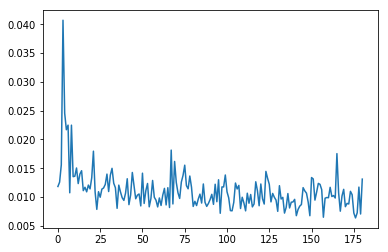

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: 

In [14]:
reward_coef = 1
num_updates = 1000

loss_hist = []
baseline = []
for _ in range(200):
    for batch_idx, data in enumerate(train_loader):
        memory = None
        losses = None
        for i in range(dataset_train.series_length):
            optimizer.zero_grad()

            s0 = data['s0'][i].cuda()
            s1 = data['s1'][i].cuda()
            action = data['a0'][i].cuda()
            r1 = data['r1'][i].cuda()
            terminal = data['terminal'][i]


            board, memory, rew = model(s0, action, memory)
            memory[terminal.squeeze()==1 ,...] = 0

            loss_state = ((board - s1)**2).mean() 
        #     loss_state = ((board - s1)**2).mean() 

            loss_reward = ((rew - r1)**2).mean()
    #         loss = loss_state + reward_coef * loss_reward
            loss = loss_state
            if losses is None:
                losses = loss
            else:
                losses += loss
#             losses.append(loss)
#             baseline.append(((s0 - s1)**2).mean())

        losses = losses.mean()
        loss_hist.append(losses.item())
        losses.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            clear_output()
            plt.plot(loss_hist)
#             plt.plot(baseline)
            plt.pause(0.01)


In [ ]:
reward_coef = 1
num_updates = 1000

loss_hist = []
baseline = []
for _ in range(200):
    for batch_idx, data in enumerate(train_loader):
        memory = None
        losses = None
        for i in range(dataset_train.series_length):
            optimizer.zero_grad()

            s0 = data['s0'][i].cuda()
            s1 = data['s1'][i].cuda()
            action = data['a0'][i].cuda()
            r1 = data['r1'][i].cuda()
            terminal = data['terminal'][i]


            board, memory, rew = model(s0, action, memory)
            memory[terminal.squeeze()==1 ,...] = 0

            loss_state = ((board - s1)**2).mean() 
        #     loss_state = ((board - s1)**2).mean() 

            loss_reward = ((rew - r1)**2).mean()
    #         loss = loss_state + reward_coef * loss_reward
            loss = loss_state
            loss.backward()
            losses.append(loss)
            baseline.append(((s0 - s1)**2).mean())

            optimizer.step()
            if batch_idx % 10 == 0:
                clear_output()
                plt.plot(losses)
                plt.plot(baseline)
                plt.pause(0.01)


In [ ]:
rew

In [ ]:
i=0

In [ ]:
action.size()
s0.size()

In [ ]:
onehot_actions = torch.zeros(s0.size(0), action.size(1), s0.size(2), s0.size(3))

onehot_actions[range(s0.size(0)), action.argmax(1).view(-1), ...] = 1


In [ ]:
action.argmax(1)